In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
data = pd.read_csv("../input/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
data['Annual Income (k$)'].mean()

60.56

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Annual Income Distribution')

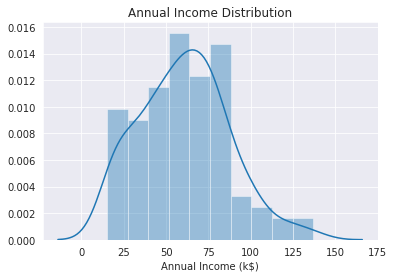

In [7]:
sns.set_style('darkgrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Age Distribution')

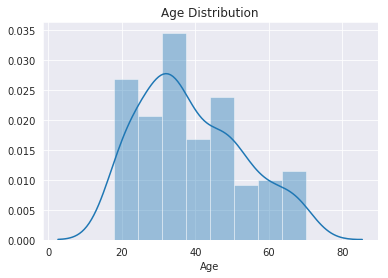

In [8]:
sns.set_style('darkgrid')
sns.distplot(data['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income vs Spending Score')

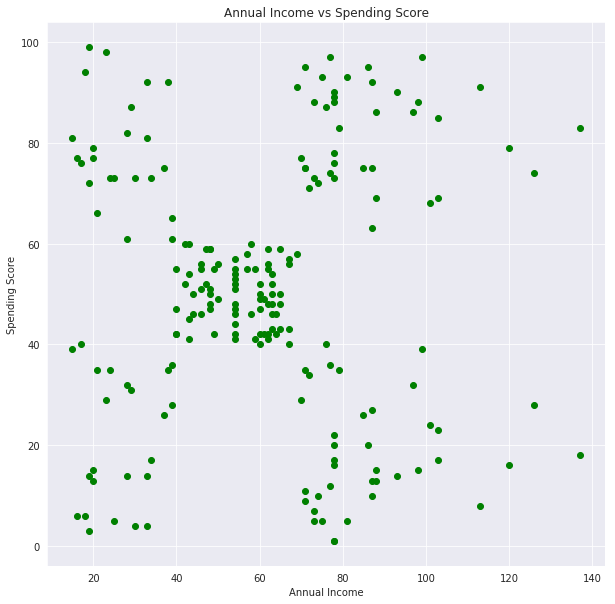

In [9]:
plt.figure(figsize = (10,10))
plt.scatter('Annual Income (k$)','Spending Score (1-100)', data = data, alpha = 1, c = 'green')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')

* We can see that customers who have high Annual income has less spending rate.
* Surprisingly, Customers whose Annual Income is below 40k also has high spending rate.
* It is good to see that the customers whose Annual income is between 40k to 70k has moderate Spending score.

In [10]:
df_gender = data['Gender'].value_counts().sort_values(ascending = True)

In [11]:
df = [go.Pie(labels = df_gender.index,
              values = df_gender.values,
              hoverinfo = 'label+value')]

plotly.offline.iplot(df,filename = 'activity_category')

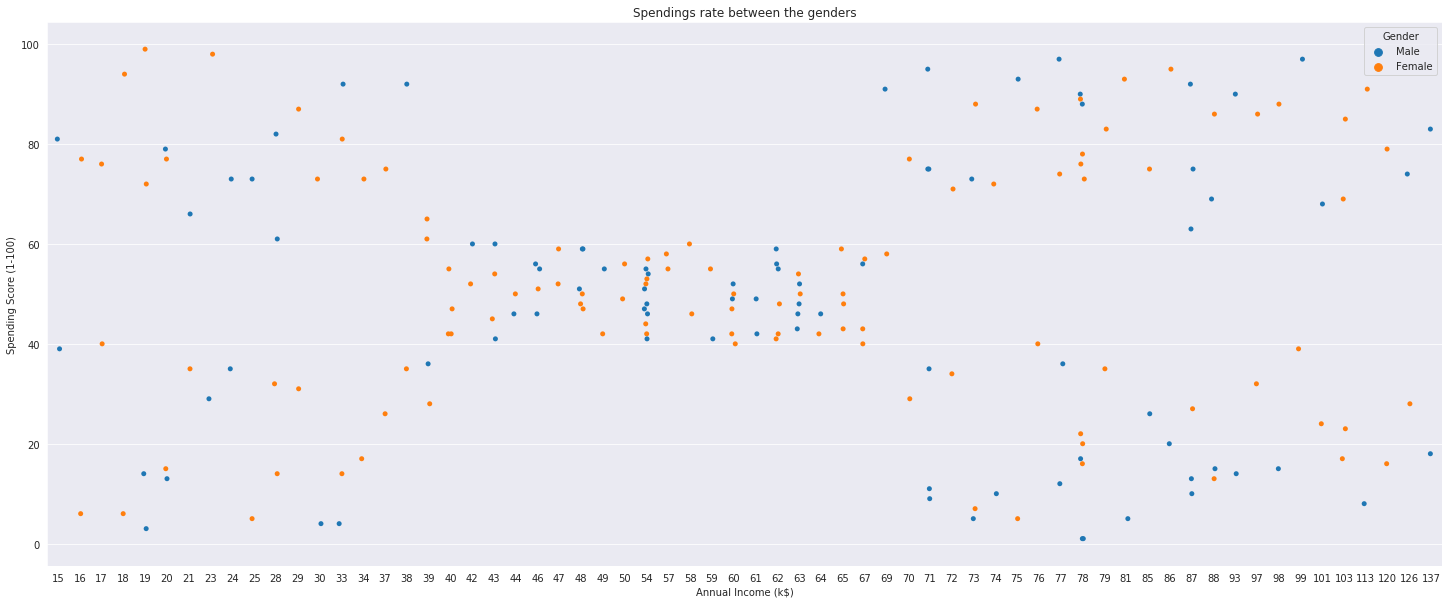

In [12]:
sns.set_style('darkgrid')
fig,ax = plt.subplots()
fig.set_size_inches(25, 10)
p = sns.stripplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=data)
title = ax.set_title('Spendings rate between the genders')

We can see that both male and female has almost equal distributions.

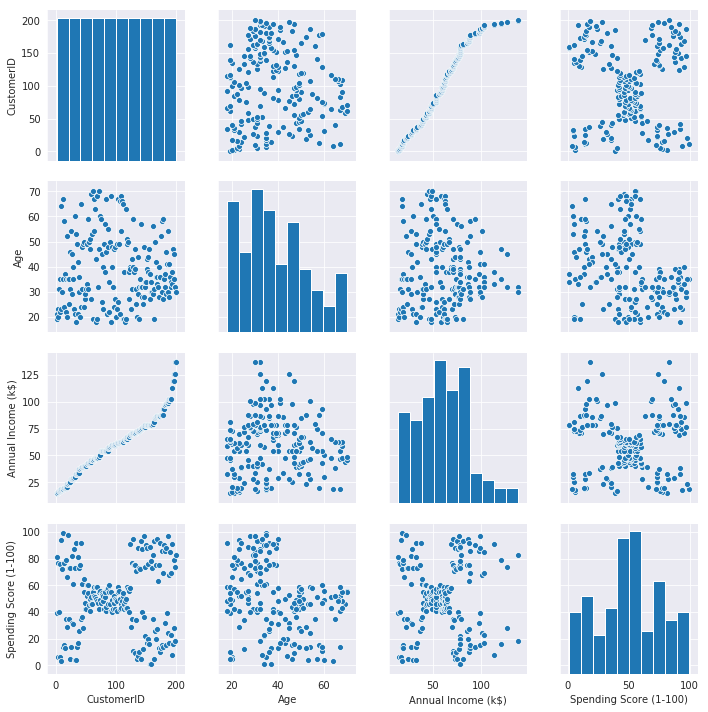

In [13]:
sns.pairplot(data)

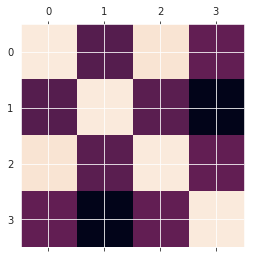

In [14]:
plt.matshow(data.corr())

This shows the correlation between different attributes of data 

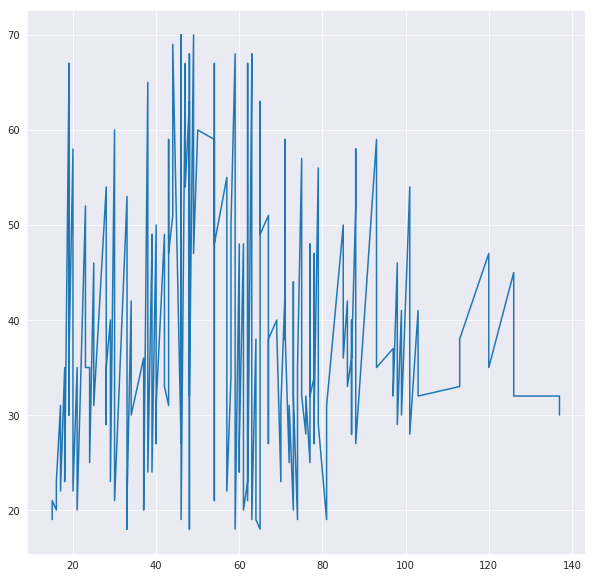

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
x = data['Annual Income (k$)']
y = data['Age']

plt.plot(x, y)

In [16]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [17]:
x = data.iloc[:,[3,4]].values


### Using Elbow method to find the optimal number of clusters

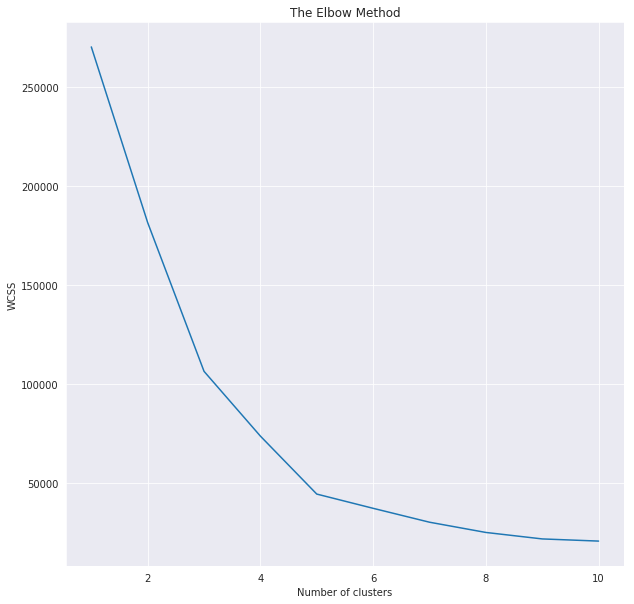

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Applying KMeans to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
y_kmeans= kmeans.fit_predict(x)


### Visualizing the cluster

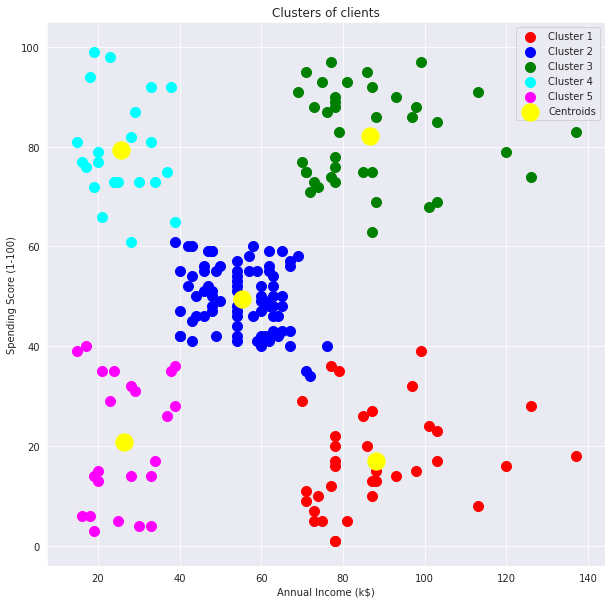

In [20]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans ==1, 1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans ==2, 1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans ==3, 1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans ==4, 1], s= 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

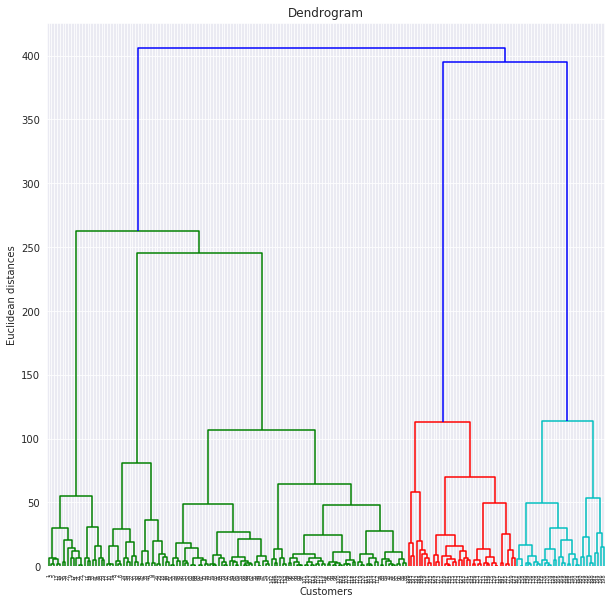

In [21]:
 # Using the Dendogram to find the optimul number of clusters
 import scipy.cluster.hierarchy as sch
 dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
 plt.title('Dendrogram')
 plt.xlabel('Customers')
 plt.ylabel('Euclidean distances')
 plt.show()

### Fitting Hierarchical clustering to the dataset

In [22]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

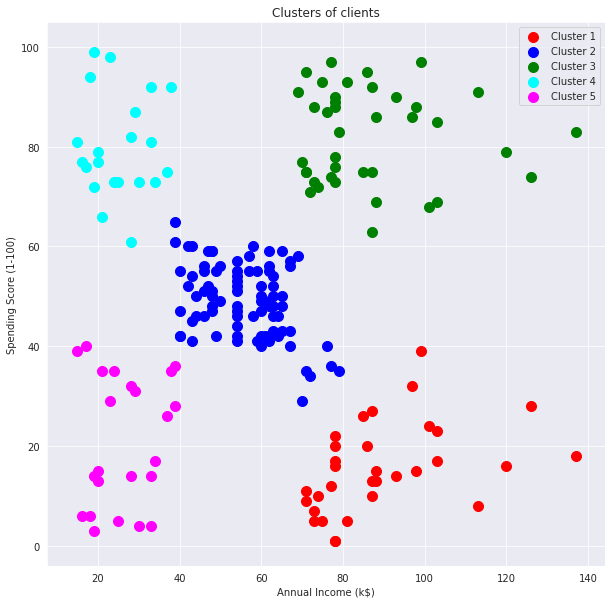

In [23]:
# Visualizing the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc ==0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc ==1, 1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc ==2, 1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc ==3, 1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc ==4, 1], s= 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 